In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import datetime
from scipy.stats import norm
import math

plt.rcParams['figure.figsize'] = (15,8)
%matplotlib inline

In [2]:
## This is small code to correct btc.csv file from coindesk. Because that csv has one extra comma at end.

#f = open('btc2.csv','a')
#for line in open('btc.csv').readlines():
#    l = line.strip('\n').strip(',')
#    f.write(l+'\n')
#f.close()

In [3]:
df = pd.read_csv('bt.csv',index_col='Date', parse_dates=True,
                 engine='python')
df2 = pd.read_csv('BTC.csv', index_col='date',parse_dates=True,names=['date','ranknow','open','high','low','close'],
                 engine='python',skiprows=1)
df3 = pd.read_csv('btc2.csv',index_col='date',parse_dates=True,
                  names=['date','txVolume(USD)','adjustedTxVolume(USD)','txCount','marketcap(USD)','price(USD)',
                         'exchangeVolume(USD)', 'generatedCoins','fees','activeAddresses', 'averageDifficulty',
                         'paymentCount','medianTxValue(USD)', 'medianFee','blockSize','blockCount'],
                  skiprows=1)

In [4]:
df3.dtypes

txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

In [5]:
df3.dropna(subset=['txVolume(USD)','marketcap(USD)'],inplace=True)
df3.fillna(0,inplace=True)

In [6]:
df3.dtypes

txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

## Bitcoin Closing prices plot (X = timespan, Y = log(ClosingPrice))

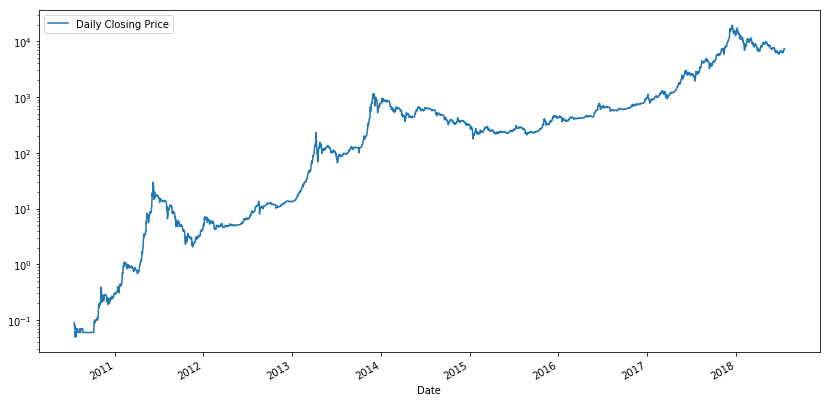

In [7]:
df.plot(figsize=(14,7),logy=True)

## Bitcoin Open, High, Low and Close Price Plot.

/home/sunny/anaconda2/envs/p3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


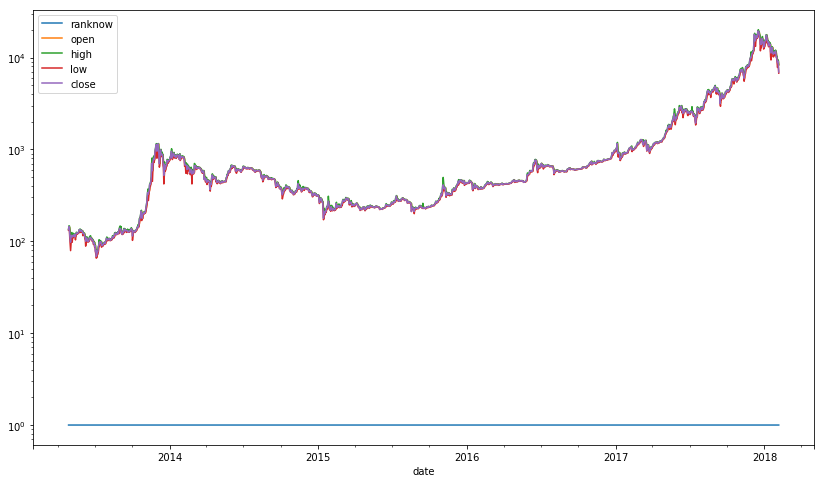

In [8]:
df2.plot(figsize=(14,8),logy=True)

In [9]:
#bitcoin = quandl.get("BCHAIN/MKPRU")

In [10]:
#bitcoin['Value'].replace(0, np.nan, inplace=True)
#bitcoin = bitcoin.dropna()
#bitcoin.Value.plot(logy=True,figsize=(15,8));
#plt.legend()

## Calculation of Returns from Closing Price for monte carlo simulation

In [11]:
df['Returns'] = (df['Daily Closing Price'].pct_change()+1).fillna(0)
#df.head()
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_returns_bitcoin = np.random.choice(df.Returns, size=(len(dates), 100))
sim_bitcoin_returns = pd.DataFrame(data=simulated_returns_bitcoin, index=dates)
#print(sim_bitcoin_returns.shape)
cum_sim_bitcoin = sim_bitcoin_returns.cumprod(axis=0)
#print(cum_sim_bitcoin.shape)
future = pd.DataFrame(data=cum_sim_bitcoin, index=dates)
future = future * df['Daily Closing Price'][-1]
future.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2018-08-12,7586.932163,7519.682051,7189.041223,7316.908367,7438.958927,7037.286226,8839.626241,8162.073011,7331.690000,7390.689338,...,7284.109711,7448.894069,7323.448627,7452.853276,7606.526527,7140.880113,7159.696958,7667.065641,7506.617672,7678.185337
2018-08-13,6929.963177,7557.334250,7818.060955,7286.673208,7442.575338,7262.797755,8697.100639,8072.625636,7218.778171,7287.283006,...,7480.701681,6307.655640,7362.298109,7541.842569,8035.364769,6793.083949,7293.329118,7456.387448,8171.761010,7404.916945
2018-08-14,6990.424404,7585.444879,8127.229296,7531.163142,7806.257462,7218.064739,8684.235106,8923.643479,7298.947143,7115.817523,...,7604.463618,6294.206481,7135.765859,7414.915277,7992.923238,6729.434951,7371.101377,7747.217965,8272.045495,7404.916945
2018-08-15,7021.378313,7620.397011,8283.842812,7500.423701,7723.564057,7365.645989,8212.586826,9704.435750,7669.572951,7340.988149,...,7462.324112,6215.835038,6760.489696,7589.857134,8407.961237,6664.632985,6557.114722,7673.434937,8285.538545,7404.916945
2018-08-16,7092.301326,7107.121024,8446.271103,7463.887190,6781.666001,7448.909667,8212.586826,9743.507022,7585.013161,6973.938742,...,7448.619200,6227.620019,6807.524049,7495.489461,8567.001573,6720.507877,5838.661014,7547.923103,8270.391309,7480.576559


## Monte Carlo Price simulation plot for Returns

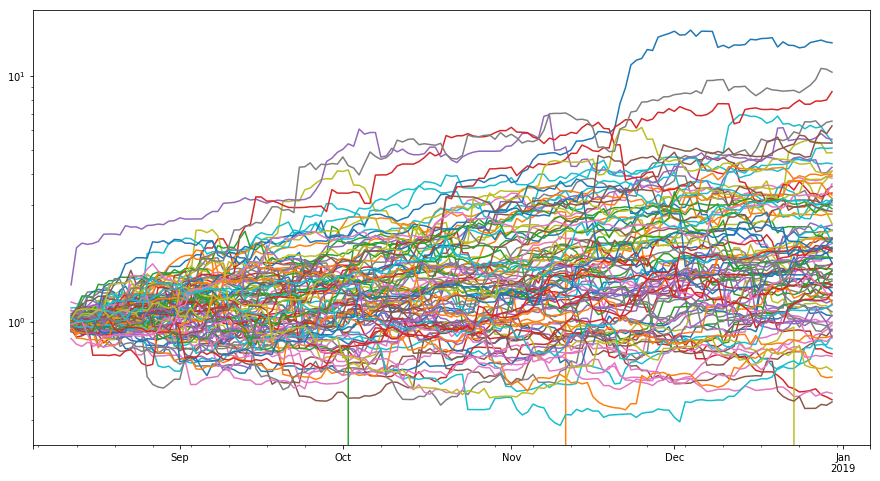

In [12]:
cum_sim_bitcoin.plot(logy=True,legend=False,figsize=(15,8))


## Monte Carlo Simulation for Closing Price

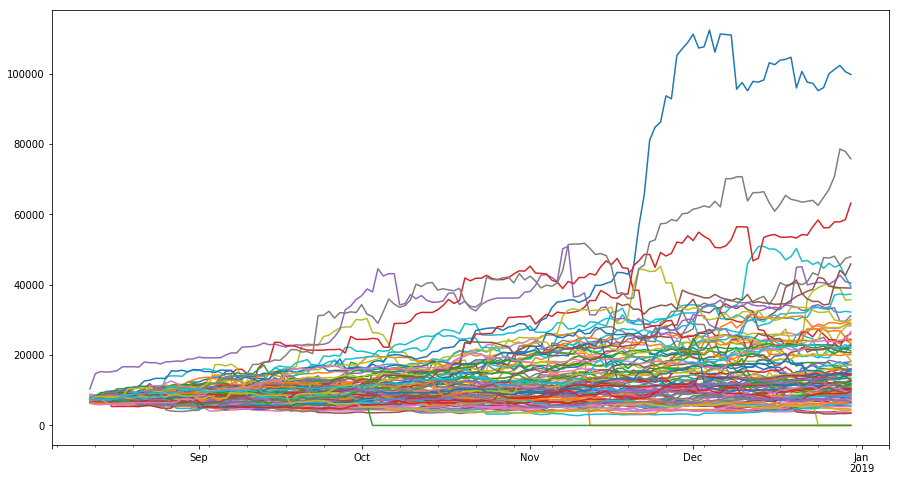

In [13]:
future.plot(legend=False, figsize=(15,8))

## Monte Carlo Simulation with log of price

Text(0,0.5,'Price ($)')

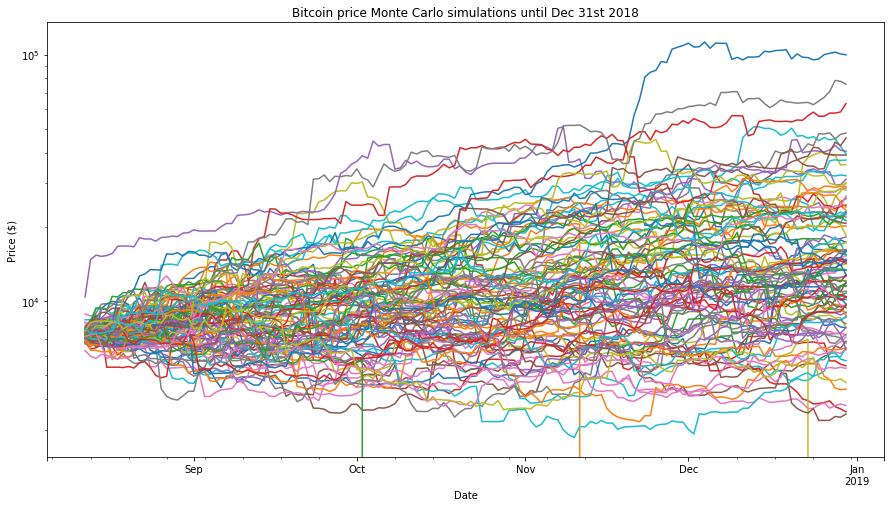

In [14]:
future.plot(logy=True,legend=False, figsize=(15,8),
            title='Bitcoin price Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Price ($)")

## Timeseries Graph of Transaction Volume and Network Value (Market Cap)

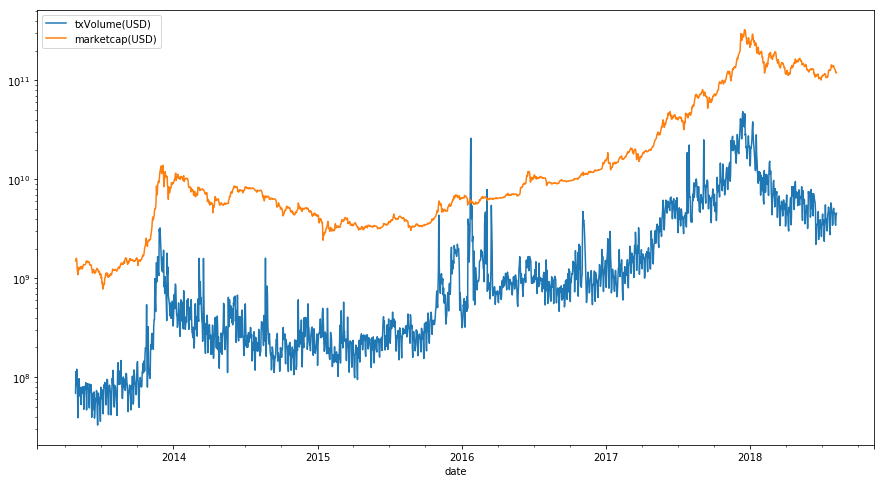

In [15]:
df3[['txVolume(USD)','marketcap(USD)']].plot(figsize=(15,8),logy=True)

## Timeseries graph of Exchange Volume and Market Cap.

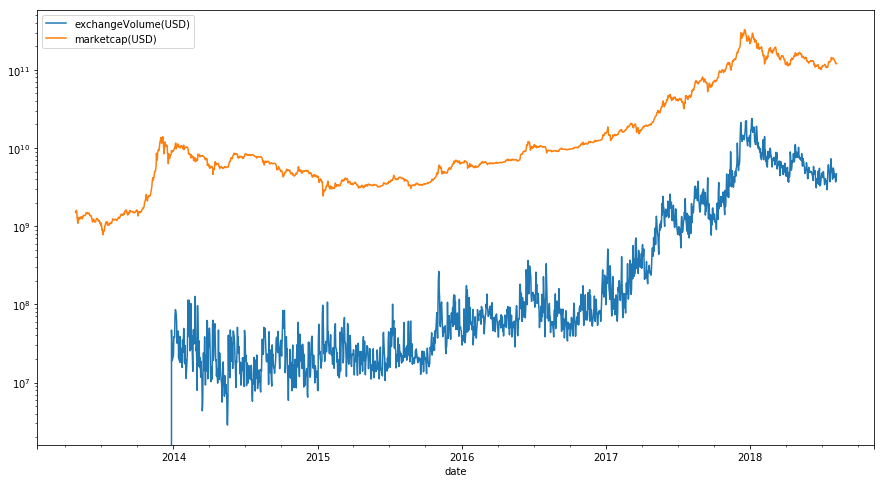

In [16]:
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8),logy=True)

## Calculation of NVT Ratio

In [17]:
df3['NVT'] = df3['marketcap(USD)'] / df3['txVolume(USD)']
df3.fillna(0,inplace=True)
df3.tail(5)['NVT']

date
2018-08-03    28.554939
2018-08-04    35.576221
2018-08-05    35.103984
2018-08-06    28.528188
2018-08-07    26.307649
Name: NVT, dtype: float64

## Timeseries plot of NVT.

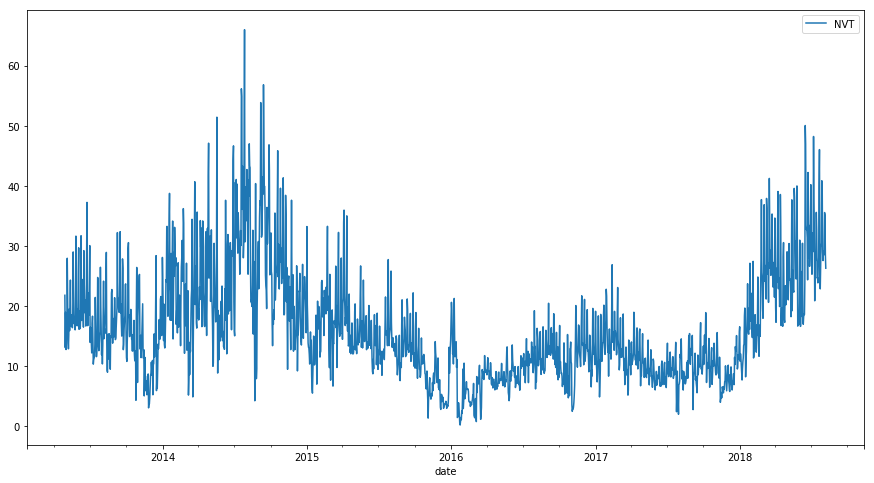

In [18]:
df3[['NVT']].plot(figsize=(15,8))

## Smothing NVT with 14 days rolling average

In [19]:
o = np.convolve(list(reversed(list(df3.NVT.values))), np.ones((14,))/14., mode='same')
o = list(reversed(o))
#print(o)
df3['SMOOTH_NVT'] = o
df3['SMOOTH_NVT'] = np.convolve(df3.NVT.values, np.ones((14,))/14., mode='same')
df3['SMOOTH_NVT'][:5]

date
2013-04-28     8.906541
2013-04-29    10.476616
2013-04-30    11.551713
2013-05-01    12.473677
2013-05-02    13.563958
Name: SMOOTH_NVT, dtype: float64

## Timeseries plot of NVT and Smooth NVT

Text(0.5,1,'NVT/SMOOTH NVT Ratio')

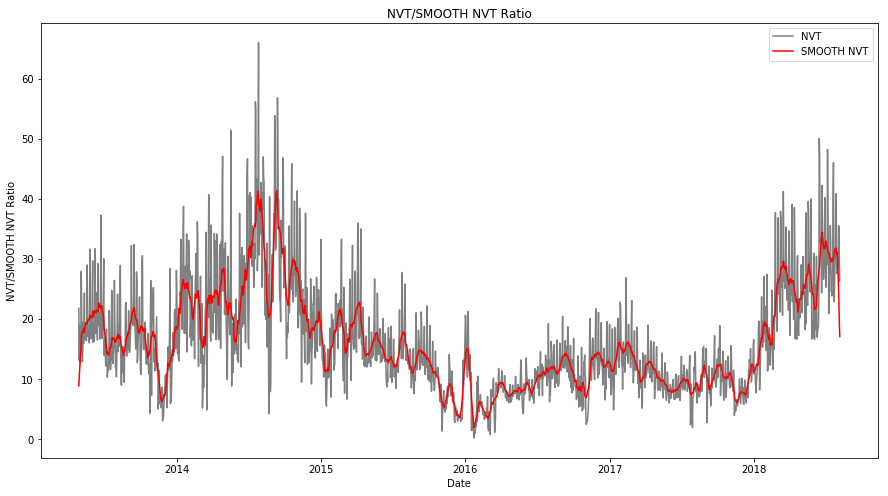

In [20]:
plt.figure(figsize=(15,8))
plt.plot(df3.index,df3.NVT,color='grey',label='NVT')
plt.plot(df3.index, df3.SMOOTH_NVT,color = 'red',label='SMOOTH NVT')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('NVT/SMOOTH NVT Ratio')
plt.title('NVT/SMOOTH NVT Ratio')
#df3[['NVT','SMOOTH_NVT']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

## Time Series Plots of NVT, SMOOTH NVT and Scaled Market Cap & Log version as well.

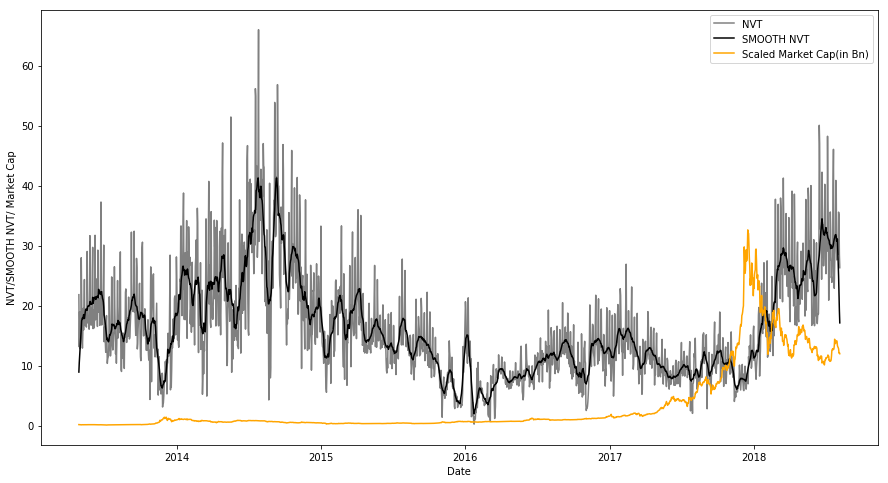

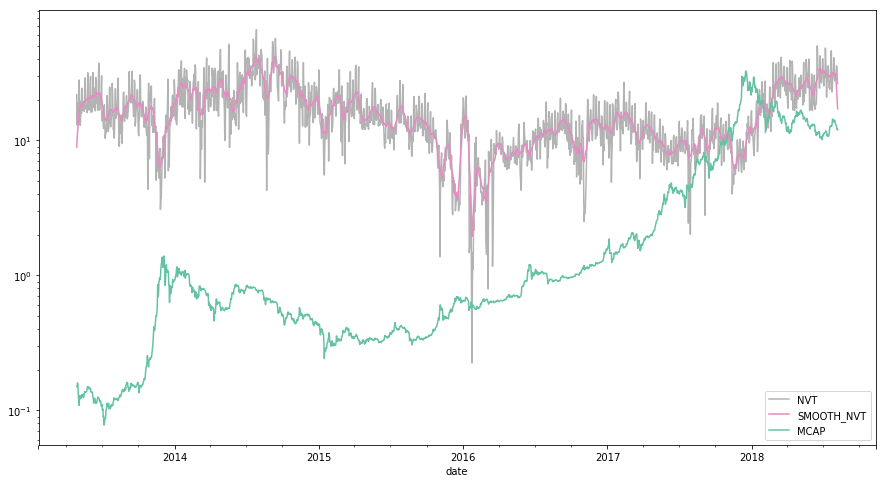

In [21]:
df3['MCAP'] = df3['marketcap(USD)'] / 10e9
plt.figure(figsize=(15,8))
plt.plot(df3.index,df3.NVT,color='grey',label='NVT')
plt.plot(df3.index,df3.SMOOTH_NVT,color='black',label='SMOOTH NVT')
plt.plot(df3.index,df3.MCAP,color='orange',label='Scaled Market Cap(in Bn)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('NVT/SMOOTH NVT/ Market Cap')
df3[['NVT','SMOOTH_NVT','MCAP']].plot(figsize=(15,8),colormap=plt.cm.Set2_r,logy=True)

## Timeseries plot of Exchange Volume (USD) and Market Cap (USD)

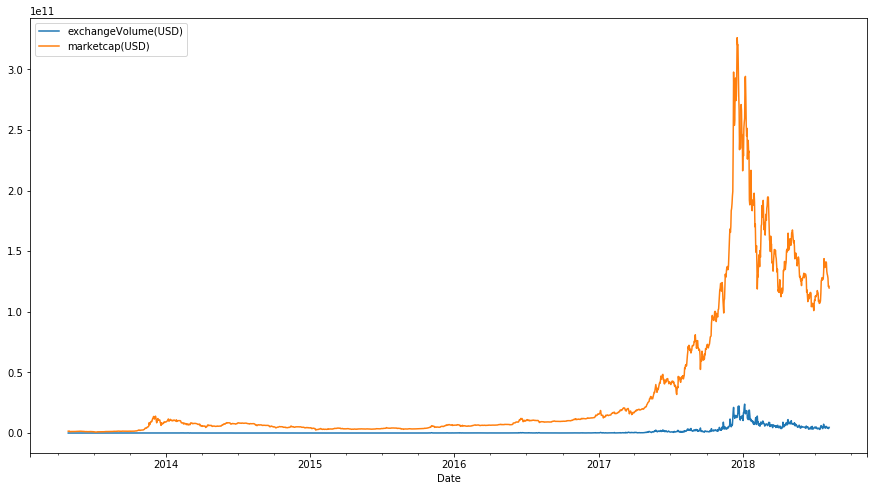

In [22]:
df3.index.name = 'Date'
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8))

## Timeseries plot of Scaled Exchange Volume (USD) and Market Cap (USD)

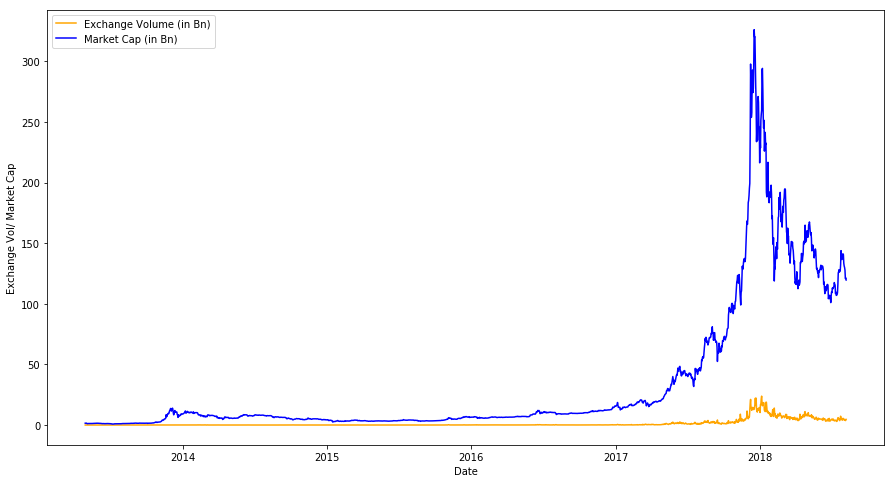

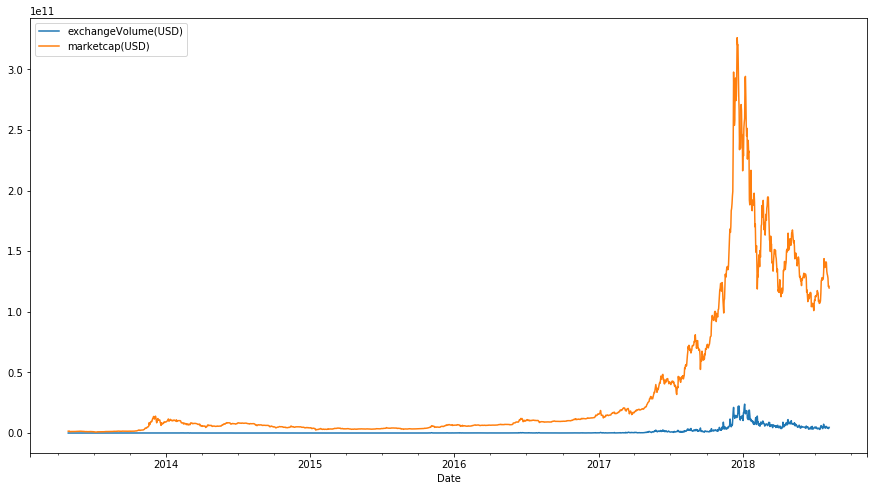

In [23]:
plt.figure(figsize=(15,8))
plt.plot(df3.index,df3['exchangeVolume(USD)']/1e9,color='orange',label='Exchange Volume (in Bn)')
plt.plot(df3.index,df3['marketcap(USD)']/1e9,color='blue',label='Market Cap (in Bn)')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Exchange Vol/ Market Cap')
df3[['exchangeVolume(USD)','marketcap(USD)']].plot(figsize=(15,8))

In [24]:
#df3.reset_index(inplace=True)
#df3.Date = [datetime.date(d.year,d.month,1) for d in df3.Date]
#df3 = df3.groupby(['Date']).sum()
#df3[['NVT','SMTH_NVT','MCAP']].plot(figsize=(15,8),colormap=plt.cm.Set2_r)

## Timeseries plot of Transaction Volume (USD)

Text(0,0.5,'txVolume(USD)')

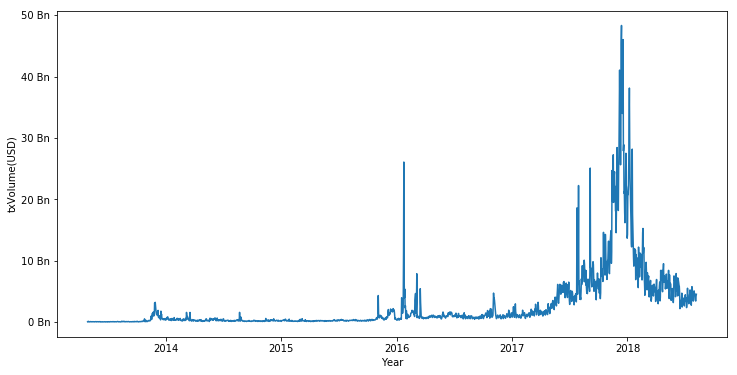

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df3.index.values,df3['txVolume(USD)'].values)
l,t = plt.yticks([0,10e9,20e9,30e9,40e9,50e9],['0 Bn','10 Bn','20 Bn','30 Bn','40 Bn','50 Bn'])                 
#plt.plot(df3.index.values,df3['marketcap(USD)'].values)
plt.xlabel('Year')
plt.ylabel('txVolume(USD)')
#plt.axes()
#plt.plot(df3.index.values,df3['marketcap(USD)'].values)

## Simulating NVT Ratio using Monte Carlo Simulation

In [26]:
df3['NVT_R'] = (df3['NVT'].pct_change()+1).fillna(0)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_nvt = np.random.choice(df3.NVT_R, size=(len(dates), 100))
sim_nvt = pd.DataFrame(data=simulated_nvt, index=dates)
cum_sim_nvt = sim_nvt.cumprod(axis=0)
future2 = pd.DataFrame(data=cum_sim_nvt, index=dates)
future2 = future2 * df3['NVT'][-1]

Text(0,0.5,'NVT')

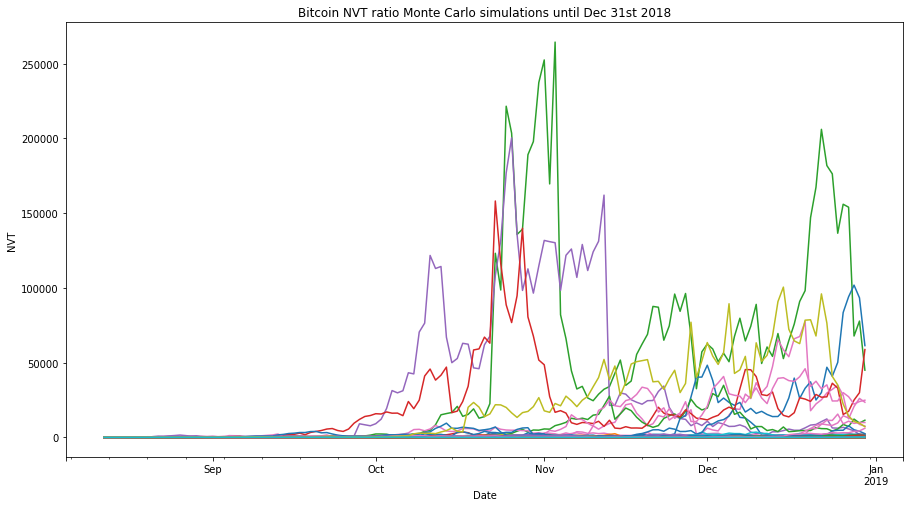

In [27]:
future2.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("NVT")

## Simulating Transaction Volume and Network Value(Market Cap) using Monte Carlo

In [28]:
df3['txVolume_R'] = (df3['txVolume(USD)'].pct_change()+1).fillna(0)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_tx_vol = np.random.choice(df3.txVolume_R, size=(len(dates), 100))
sim_tx_vol = pd.DataFrame(data=simulated_tx_vol, index=dates)
cum_sim_tx_vol = sim_tx_vol.cumprod(axis=0)
future3 = pd.DataFrame(data=cum_sim_tx_vol, index=dates)
future3 = future3 * df3['txVolume(USD)'][-1]

df3['marketcap_R'] = (df3['marketcap(USD)'].pct_change()+1).fillna(0)
dates = pd.date_range(start=datetime.date.today(),end='2018-12-30')
np.random.seed(1234)
simulated_marketcap_R = np.random.choice(df3.marketcap_R, size=(len(dates), 100))
sim_marketcap_R = pd.DataFrame(data=simulated_marketcap_R, index=dates)
cum_sim_marketcap_R = sim_marketcap_R.cumprod(axis=0)
future4 = pd.DataFrame(data=cum_sim_marketcap_R, index=dates)
future4 = future4 * df3['marketcap(USD)'][-1]

df4 = pd.DataFrame(data = future4.values / future3.values)
df4 = df4.set_index(future4.index)

/home/sunny/anaconda2/envs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


Text(0,0.5,'NVT')

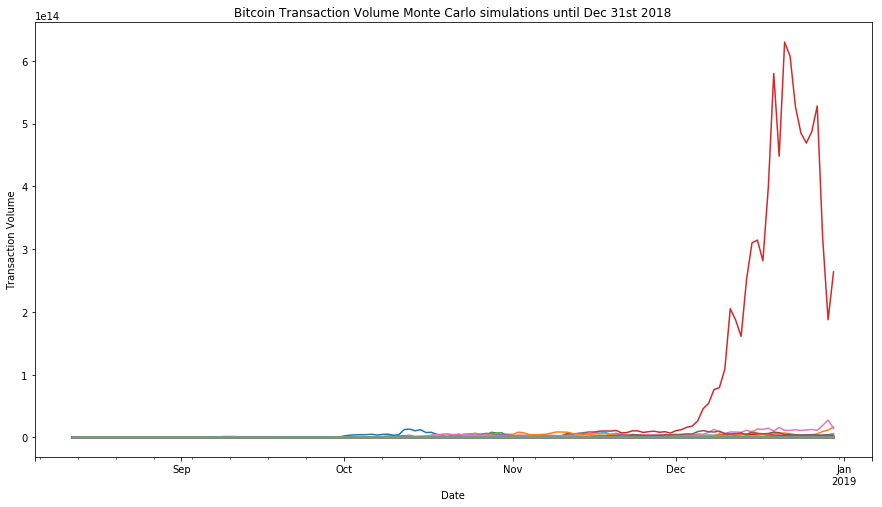

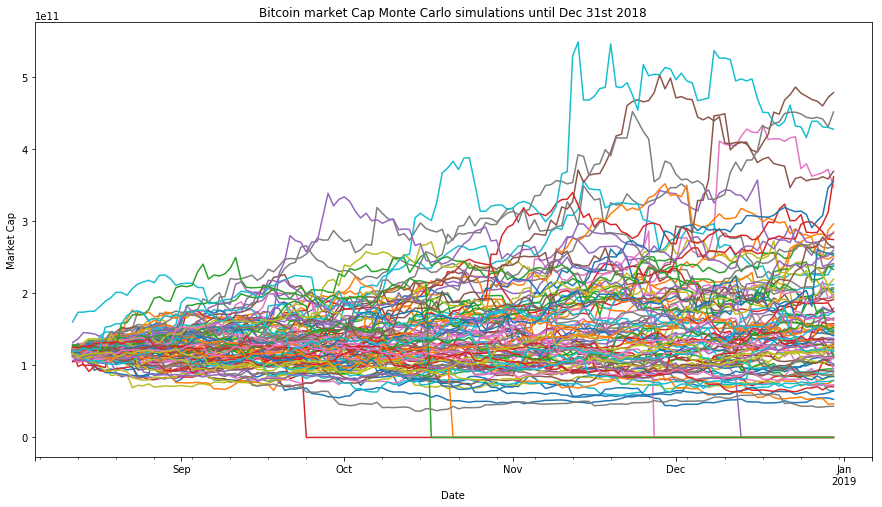

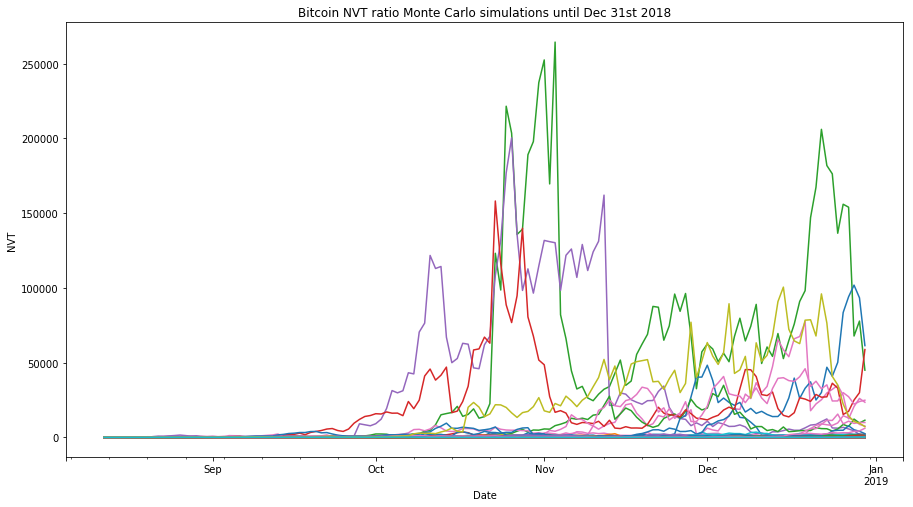

In [29]:
future3.plot(legend=False, figsize=(15,8), title='Bitcoin Transaction Volume Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Transaction Volume")
future4.plot(legend=False, figsize=(15,8), title='Bitcoin market Cap Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("Market Cap")
df4.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.Circle((2000,'2018-09-01'),20,visible=True,fill=True)
plt.xlabel('Date')
plt.ylabel("NVT")

In [30]:
df3.head()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,...,medianTxValue(USD),medianFee,blockSize,blockCount,NVT,SMOOTH_NVT,MCAP,NVT_R,txVolume_R,marketcap_R
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,6.879868e+07,3.153714e+07,41702,1.500520e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,...,49.980091,0.0005,21597536,177,21.810300,8.906541,0.150052,0.000000,0.000000,0.000000
2013-04-29,1.138128e+08,4.821652e+07,51602,1.491160e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,...,62.425891,0.0005,25676453,174,13.101861,10.476616,0.149116,0.600719,1.654288,0.993762
2013-04-30,8.426632e+07,5.686790e+07,47450,1.597780e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,...,26.942145,0.0005,27042465,149,18.961074,11.551713,0.159778,1.447205,0.740394,1.071501
2013-05-01,1.206825e+08,8.208736e+07,55176,1.542820e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,...,38.671980,0.0005,25727393,151,12.784120,12.473677,0.154282,0.674230,1.432156,0.965602
2013-05-02,9.337533e+07,5.823736e+07,55295,1.292190e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,...,35.382348,0.0005,26388234,134,13.838666,13.563958,0.129219,1.082489,0.773727,0.837551


Text(0,0.5,'NVT')

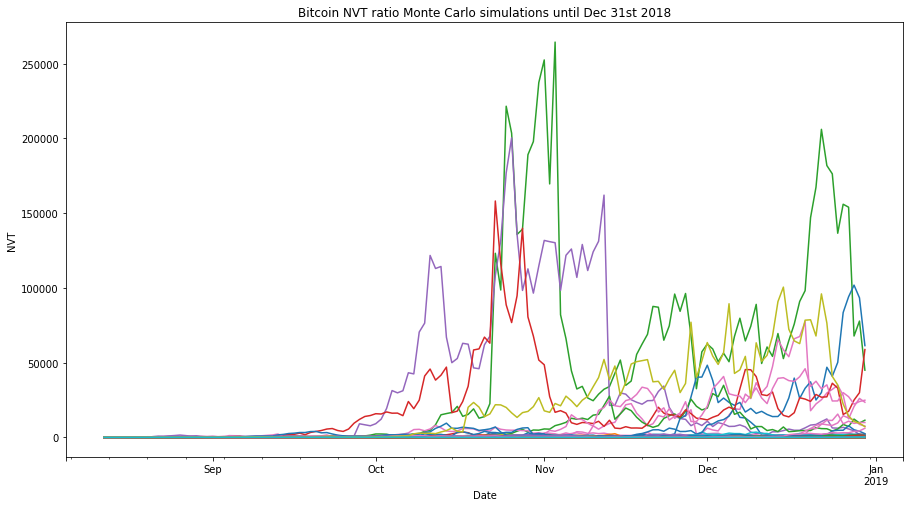

In [31]:
future2.plot(legend=False, figsize=(15,8),
            title='Bitcoin NVT ratio Monte Carlo simulations until Dec 31st 2018')
plt.xlabel('Date')
plt.ylabel("NVT")
#plt.axhline(y=50000,xmin=0,xmax=10000,color='blue')
#plt.axvline(x=50,ymin=0,ymax=10000,color='blue')

## Functoin plots of e^−2αXt with α = 0.1, 0.5, 1, 2. Green zone: positive drift; red zone:negative drift.

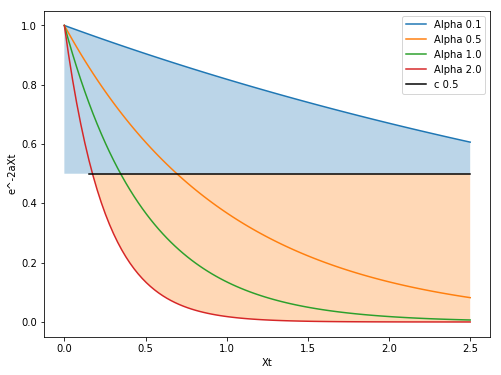

In [32]:
fig = plt.figure(figsize=(8,6))
Xt = np.linspace(0,2.5,100)
c = 0.5
for alpha in [0.1, 0.5, 1.0, 2.0]:
    plt.plot(Xt,np.exp(Xt*alpha*-2),label='Alpha %s'%alpha)    
t = zip(Xt,np.exp(Xt*alpha*-2))
location = [(j,i) for j,i in enumerate(t) if  str(i[1])[:3] == '0.5']
#print(location)
plt.plot(Xt[location[0][0]:],[c]*len(Xt[location[0][0]:]),color='black',label='c %s'%c)

y2 = np.array(len(Xt)*[c])
upper = zip(Xt,np.exp(Xt*2.1*-2))

plt.fill_between(Xt, y2 ,np.exp(Xt*0.1*-2), alpha=0.3)
plt.fill_between(Xt, y2, np.exp(Xt*2.0*-2), where= Xt > location[0][1][0], alpha=0.3)
plt.xlabel('Xt')
plt.ylabel('e^-2aXt')
plt.legend(loc='best')

## Sample path for Xt in 4 years time. Parameters are chosen as α = 1, X0 = 0 and dt 1/250 .

In [47]:
def get_brownian(n):
    # Process parameters
    #delta = 0.25
    delta = 1.0/250.0
    #dt = 1.0/250.0
    dt = 1.0
    # Initial condition.
    x = 0.0
    Wt = [0.0]
    # Iterate to compute the steps of the Brownian motion.
    for k in range(n):
        x = x + norm.rvs(scale=delta**2*dt)
        Wt.append(x)
    return Wt

def brownian_path(N):
    Δt_sqrt = math.sqrt(1 / N)
    Z = np.random.randn(N)
    Z[0] = 0
    B = np.cumsum(Δt_sqrt * Z)
    return B

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    print(x0.shape + (n,))
    r = norm.rvs(size=x0.shape + (n,), scale=delta*math.sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [52]:
def get_series():
    dt = 1.0 / 250.0
    tim = np.arange(0.0,4.0,dt)
    alpha = 1.0
    eta = 0.1
    c = 0.5
    Xt = np.zeros(len(tim)+1)
    dWt = brownian_path(len(tim))
    eq,eq10 = np.log(0.5) / (-2.0 * alpha),np.log(0.05) / (-2.0 * alpha)
    for i in range(len(tim)):
        t = np.exp(-2.0 * alpha * Xt[i])
        tf = t - c
        dXt = (eta * tf * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim,eq,eq10

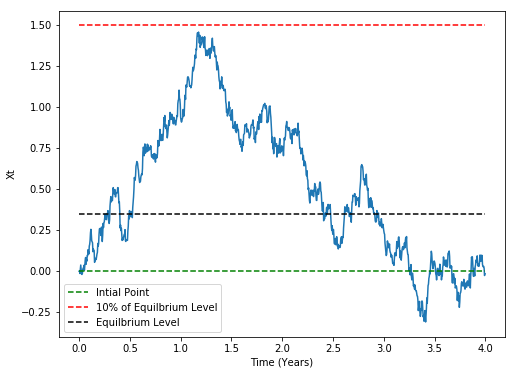

In [71]:
#Xt,eq,eq10 = get_series()
Xt,tim,eq,eq10 = get_series()
#Xt = np.exp(Xt)
fig = plt.figure(figsize=(8,6))
plt.plot(tim,Xt[:len(tim)])
plt.plot(tim, len(tim)*[0.0],linestyle='dashed',label='Intial Point',color='green')

plt.plot(tim, len(tim)*[eq10],linestyle='dashed',label = '10% of Equilbrium Level',color='red')

plt.plot(tim, len(tim)*[eq],linestyle='dashed',label = 'Equilbrium Level',color='black')
plt.xlabel('Time (Years)')
plt.ylabel('Xt')
plt.legend(loc='best')

12

In [181]:
ixic = pd.read_csv('^IXIC.csv',index_col='Date',parse_dates=True)
ssec = pd.read_csv('^SSEC.csv',index_col='Date',parse_dates=True)

In [182]:
ixic.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


In [183]:
ssec.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035,1199.061035,0.0
1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047,1150.623047,0.0
1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041,1159.342041,0.0
1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970,1096.818970,0.0
1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016,1109.666016,0.0


## NASDAQ ^IXIC Calculation and Graphs

In [214]:
#ixic.index.name = 'Date'
t1 = [int(i) for i in '1997-01-02'.split('-')]   # (P0 = 1, 280), (Pt = 1, 436)
t2 = [int(i) for i in '1997-06-26'.split('-')]

X1 = ixic[(ixic.index > pd.to_datetime('1997-01-02')) & (ixic.index < pd.to_datetime('1997-06-26'))] 

t3 = [int(i) for i in '1997-06-26'.split('-')] # (Pt = 1, 436), (P t = 2, 309)
t4 = [int(i) for i in '1999-02-10'.split('-')]

X2 = ixic[(ixic.index > pd.to_datetime('1997-06-26')) & (ixic.index < pd.to_datetime('1999-02-10'))] 

t5 = [int(i) for i in '1999-02-10'.split('-')]  #(P = 2, 309), (P = 3, 171).
t6 = [int(i) for i in '2000-10-18'.split('-')]

X3 = ixic[(ixic.index > pd.to_datetime('1999-02-10')) & (ixic.index < pd.to_datetime('2000-10-18'))] 

XR_hat = 0.67 # (PR = 2, 502).
eta_hat = 0.39
alpha_hat = 0.23
sigma_hat = 0.43
c_hat = 0.73

##  OU Process
k_hat, mu_hat,sig_hat = (0.47, 1.09, 0.31)

## BM Process
mw_hat, sigm_hat = (0.25, 0.31)

#ixic[['Close','Adj Close']].plot(figsize=(8,6))
def get_series2(X0, dt , eta_hat,alpha_hat,sigma_hat,c_hat, total ):
    tim = np.arange(0.0,total,1)
    Xt = np.zeros(len(tim))
    dWt = brownian_path(len(tim))
    Xt[0] = X0
    for i in range(len(tim)-1):
        t = np.exp(-2.0 * alpha_hat * (Xt[i]/sigma_hat)) - c_hat
        dXt = (eta_hat * t * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim
total = (len(X1)+len(X2)+len(X3))
dt = 1.0 / total

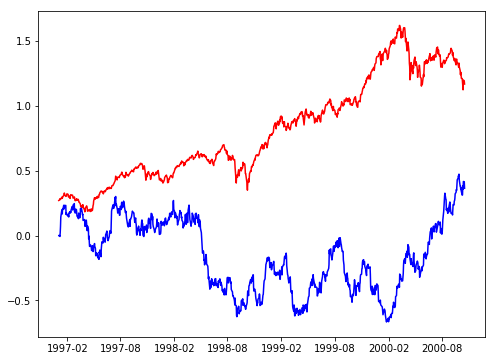

In [215]:
Xt,tim = get_series2(0, dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)
plt.figure(figsize = (8,6))
timespan = list(X1.index)+list(X2.index)+list(X3.index)
plt.plot(timespan,Xt,color='blue',label='Xt Sample path')
adj_price = np.log(np.array(list(X1['Adj Close']/1000)+list(X2['Adj Close']/1000)+list(X3['Adj Close']/1000)))
plt.plot(timespan, adj_price,color='red',label='log of adj close price')

In [216]:
X_F = np.array(list(X1.Close.values)+list(X2.Close.values) + list(X3.Close.values))
#X_F = [X1.Close[0]]
X_F += Xt

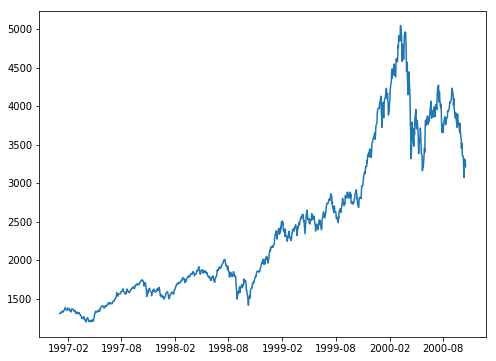

In [217]:
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),X_F)

In [218]:
#y = pd.date_range(start='2000-10-18',end='2001-10-10')


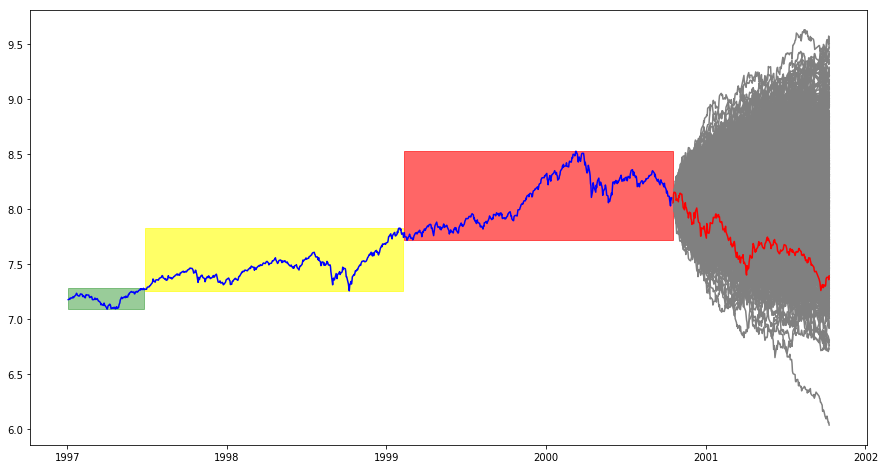

In [219]:
plt.figure(figsize=(15,8))
#X = list(X1.index)+list(X2.index)+list(X3.index)
#y = np.array(list(X1.Close)+list(X2.Close)+list(X3.Close))
#plt.plot(X,np.log(y),color='orange')
plt.plot(X1.index, np.log(X1.Close),X2.index, np.log(X2.Close),X3.index, np.log(X3.Close),color='blue')
plt.fill_between(X1.index,np.max(np.log(X1.Close)),np.min(np.log(X1.Close)),alpha=0.4,color='green')
plt.fill_between(X2.index,np.max(np.log(X2.Close)),np.min(np.log(X2.Close)),alpha=0.6,color='yellow')
plt.fill_between(X3.index,np.max(np.log(X3.Close)),np.min(np.log(X3.Close)),alpha=0.6,color='red')

y = pd.date_range(start='2000-10-18',end='2001-10-10')
X4 = ixic[ixic.index.isin(y)]
for i in range(1000):
    Xt,tim = get_series2(0,dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)
    plt.plot(X4.index, Xt[:len(X4.index)]+np.log(X3.Close[-1]),color='grey')
plt.plot(X4.index, np.log(X4.Close),color='red')

## Shangai calculation and Graphs

In [195]:
# Shangai 
t1 = [int(i) for i in '2006-01-04'.split('-')]   # (P0 = 1, 180), (P t = 1,288)
t2 = [int(i) for i in '2006-03-06'.split('-')]

X1 = ssec[(ssec.index > pd.to_datetime('2006-01-04')) & (ssec.index < pd.to_datetime('2006-03-06'))] 

t3 = [int(i) for i in '2006-03-06'.split('-')] # (Pt1 = 1, 288), (Pt2 = 4, 053)
t4 = [int(i) for i in '2007-05-30'.split('-')]

X2 = ssec[(ssec.index > pd.to_datetime('2006-03-06')) & (ssec.index < pd.to_datetime('2007-05-30'))] 

t5 = [int(i) for i in '2007-05-30'.split('-')]  # (P = 4, 053) to  (P = 3, 116).
t6 = [int(i) for i in '2008-04-21'.split('-')]

X3 = ssec[(ssec.index > pd.to_datetime('2007-05-30')) & (ssec.index < pd.to_datetime('2008-04-21'))] 

XR_hat = 1.23 # (P R = 4, 040).
eta_hat = 0.32
alpha_hat = 0.14
sigma_hat = 0.56
c_hat = 0.70

##  OU Process
k_hat, mu_hat,sig_hat = (3.30, 0.97, 1.20)

## BM Process
mw_hat, sigm_hat = (0.44, 0.33)

#ixic[['Close','Adj Close']].plot(figsize=(8,6))
def get_series2(X0, dt , eta_hat,alpha_hat,sigma_hat,c_hat, total ):
    tim = np.arange(0.0,total,1)
    Xt = np.zeros(len(tim))
    dWt = brownian_path(len(tim))
    Xt[0] = X0
    for i in range(len(tim)-1):
        t = np.exp(-2.0 * alpha_hat * (Xt[i]/sigma_hat)) - c_hat
        dXt = (eta_hat * t * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim
total = (len(X1)+len(X2)+len(X3))
dt = 1.0 / total


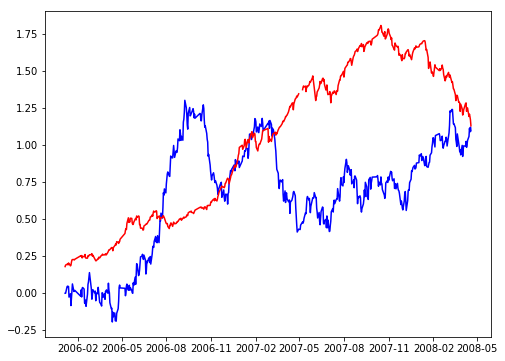

In [196]:
Xt,tim = get_series2(0,dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)
plt.figure(figsize = (8,6))
timespan = list(X1.index)+list(X2.index)+list(X3.index)
plt.plot(timespan,Xt,color='blue',label='Xt Sample path')
adj_price = np.log(np.array(list(X1['Adj Close']/1000)+list(X2['Adj Close']/1000)+list(X3['Adj Close']/1000)))
plt.plot(timespan, adj_price,color='red',label='log of adj close price')

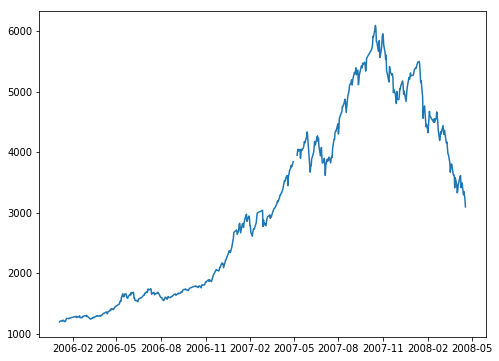

In [197]:
X_F = np.array(list(X1.Close.values)+list(X2.Close.values) + list(X3.Close.values))
X_F += Xt
timespan = list(X1.index)+list(X2.index)+list(X3.index)
plt.figure(figsize=(8,6))
plt.plot(timespan,X_F)
adj_price = np.log(np.array(list(X1['Adj Close'])+list(X2['Adj Close'])+list(X3['Adj Close'])))
#plt.plot(timespan, adj_price,color='red',label='log of adj close price')

In [210]:
#X4[:2],X3[-2:]

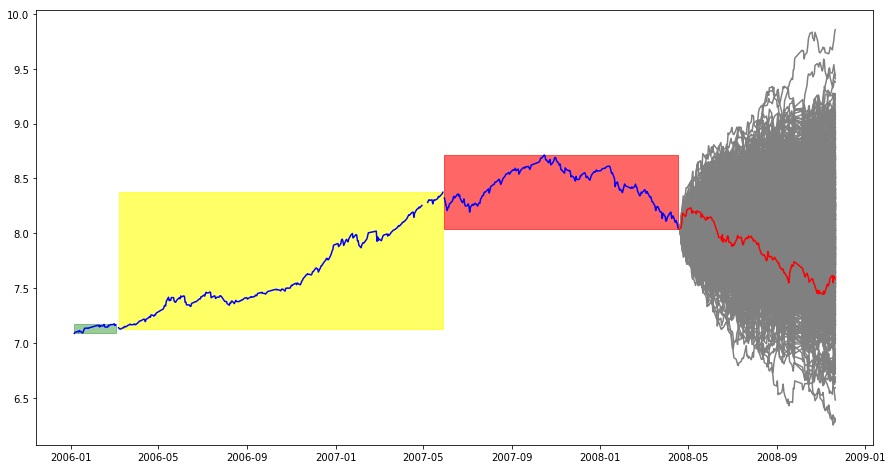

In [212]:
plt.figure(figsize=(15,8))
#X = list(X1.index)+list(X2.index)+list(X3.index)
#y = np.array(list(X1.Close)+list(X2.Close)+list(X3.Close))
#plt.plot(X,np.log(y),color='orange')
plt.plot(X1.index, np.log(X1.Close),X2.index, np.log(X2.Close),X3.index, np.log(X3.Close),color='blue')
plt.fill_between(X1.index,np.max(np.log(X1.Close)),np.min(np.log(X1.Close)),alpha=0.4,color='green')
plt.fill_between(X2.index,np.max(np.log(X2.Close)),np.min(np.log(X2.Close)),alpha=0.6,color='yellow')
plt.fill_between(X3.index,np.max(np.log(X3.Close)),np.min(np.log(X3.Close)),alpha=0.6,color='red')

y = pd.date_range(start='2008-04-18',end='2008-11-21')
X4 = ssec[ssec.index.isin(y)]
for i in range(1000):
    Xt,tim = get_series2(0,dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)
    plt.plot(X4.index, Xt[:len(X4.index)]+np.log(X3.Close[-1]),color='grey')
plt.plot(X4.index, np.log(X4.Close),color='red')

## Bitcoin Xt path calculation and Graphs

In [343]:
t1 = [int(i) for i in '2016-01-01'.split('-')]
t2 = [int(i) for i in '2016-05-30'.split('-')]

X1 = df[(df.index.date > datetime.date(*t1)) & (df.index.date < datetime.date(*t2))] #(P0 = 433), (Pt1 = 528)

t3 = [int(i) for i in '2016-05-30'.split('-')]
t4 = [int(i) for i in '2017-08-13'.split('-')]

X2 = df[(df.index.date > datetime.date(*t3)) & (df.index.date < datetime.date(*t4))] #(Pt = 528), (Pt = 4,327);

t5 = [int(i) for i in '2017-08-13'.split('-')]
t6 = [int(i) for i in '2017-12-10'.split('-')]

X3 = df[(df.index.date > datetime.date(*t5)) & (df.index.date < datetime.date(*t6))] # (P = 4,327), (P = 14,371).

XR_hat = 2.30 # (PR = 4, 327);
eta_hat = 0.51
alpha_hat = 0.08
sigma_hat = 0.91
c_hat = 0.69

def get_series2(dt , eta_hat,alpha_hat,sigma_hat,c_hat, total ):
    tim = np.arange(0.0,total,1)
    Xt = np.zeros(len(tim))
    dWt = brownian_path(len(tim))

    for i in range(len(tim)-1):
        t = np.exp(-2.0 * alpha_hat * (Xt[i]/sigma_hat)) - c_hat
        dXt = (eta_hat * t * dt) + dWt[i]
        Xt[i+1] = dXt
    return np.array(Xt),tim
total = (len(X1)+len(X2)+len(X3))
dt = 1.0 / total
Xt,tim = get_series2(dt,eta_hat,alpha_hat,sigma_hat,c_hat,total)

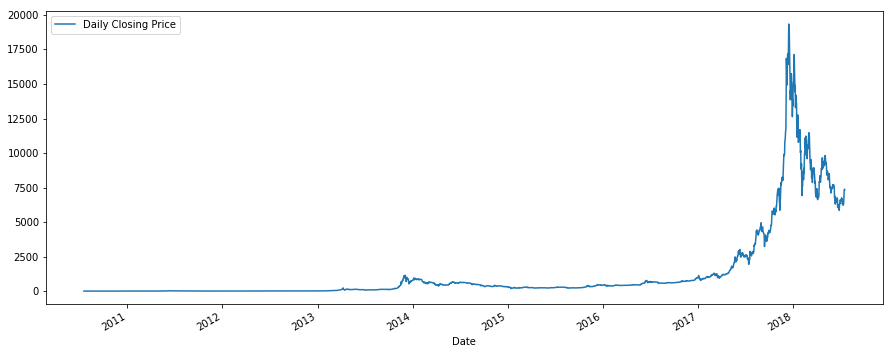

In [223]:
df['Daily Closing Price'].plot(figsize=(15,6))
plt.legend(loc='best')

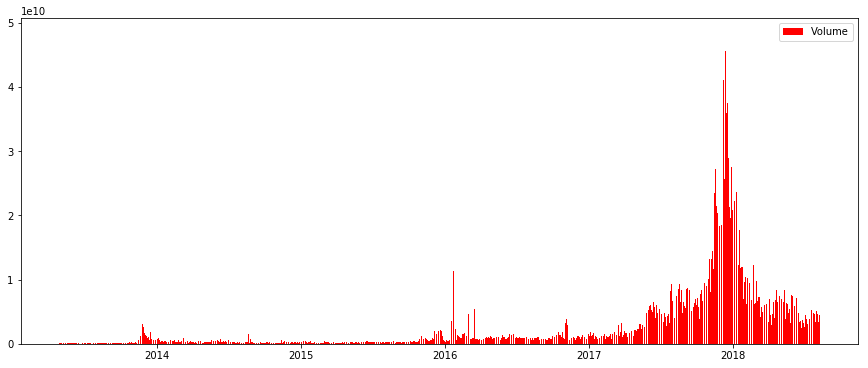

In [231]:
#df3['txVolume(USD)'].plot(figsize=(15,6), kind='bar',color='red')
plt.figure(figsize=(15,6))
plt.bar(df3.index,df3['txVolume(USD)'].values,color='red',label='Volume')
plt.legend(loc='best')

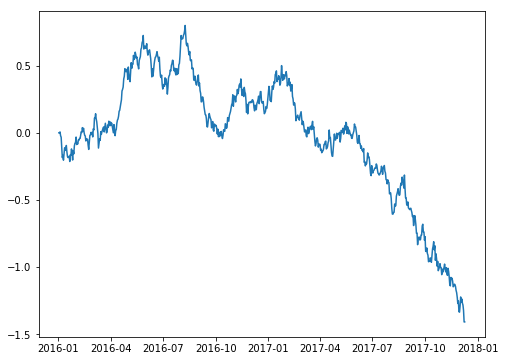

In [344]:
plt.figure(figsize = (8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),Xt)

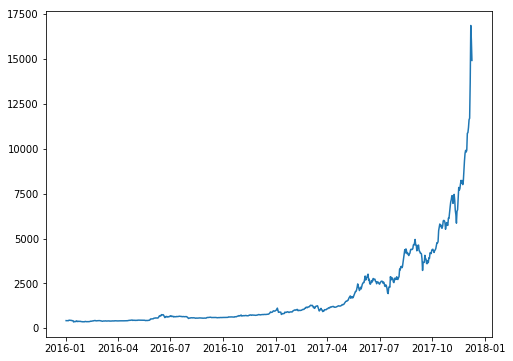

In [345]:
X_F = np.array(list(X1['Daily Closing Price'].values)+list(X2['Daily Closing Price'].values) + list(X3['Daily Closing Price'].values))
X_F += Xt
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),X_F)
#plt.plot(list(X1.index)+list(X2.index)+list(X3.index),np.log(X_F))

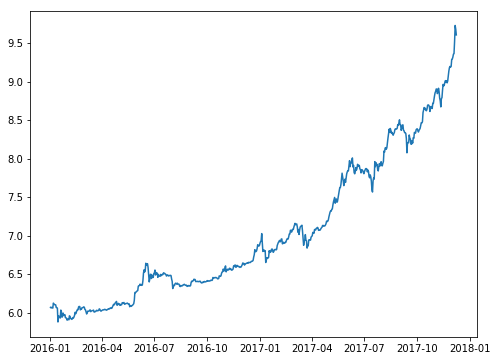

In [346]:
plt.figure(figsize=(8,6))
plt.plot(list(X1.index)+list(X2.index)+list(X3.index),np.log(X_F))

-1

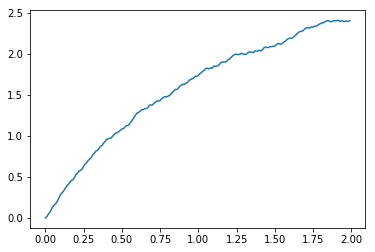

In [347]:
th = 1;
mu = 1.2;
sig = 0.3;
dt = 1e-2;
t = np.arange(0,2,dt)     #        % Time vector
x = np.zeros(len(t)); #% Allocate output vector, set initial condition
np.random.seed(1234);                # % Set random seed
for i in range(len(t)-1):
    x[i+1] = x[i]+th*(mu-x[i])*dt+sig*math.sqrt(dt)*np.random.rand();
plt.plot(t,x);-1

## Bitcoin Volatility Graph

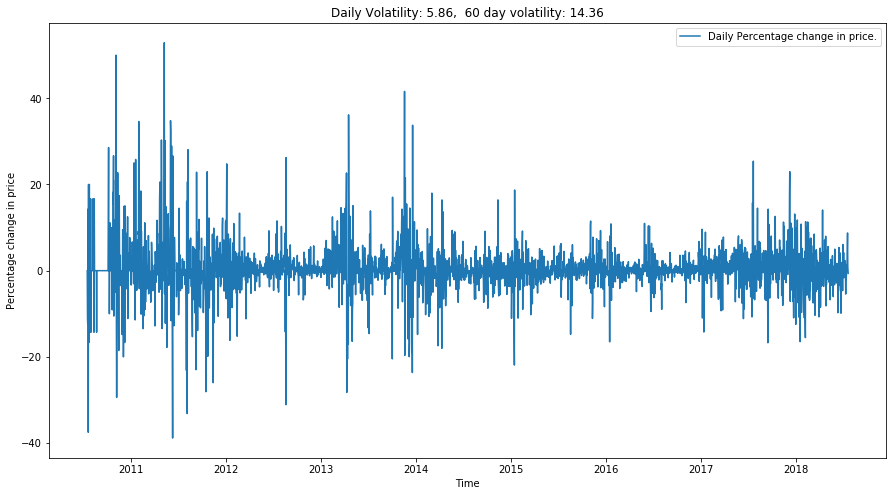

In [349]:
bitcoin_volatility = pd.read_csv('bt.csv',index_col='Date', parse_dates=True,
                 engine='python')
bitcoin_volatility['Returns'] = bitcoin_volatility['Daily Closing Price'].pct_change().fillna(0)
bitcoin_volatility['Returns'] = bitcoin_volatility['Returns']*100

daily_volatility = bitcoin_volatility['Returns'].std()
sixty_day_volatility = daily_volatility * math.sqrt(6)
plt.figure(figsize=(15,8))
plt.plot(bitcoin_volatility.index,bitcoin_volatility.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')

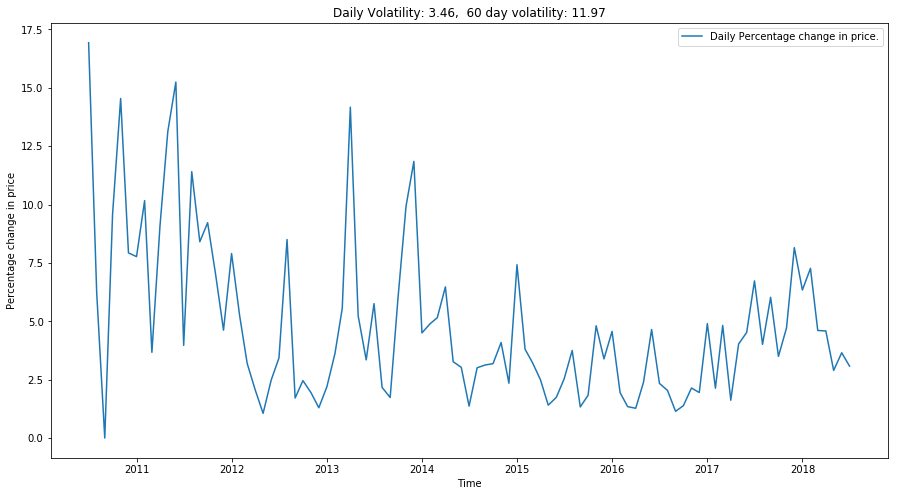

In [348]:
bitcoin_volatility1 = bitcoin_volatility.reset_index()
bitcoin_volatility1.Date = [datetime.date(d.year,d.month,1) for d in bitcoin_volatility1.Date]
bitcoin_volatility1 = bitcoin_volatility1.set_index('Date')
bitcoin_volatility1 = bitcoin_volatility1[['Returns']]
bitcoin_volatility1 = bitcoin_volatility1.groupby(['Date']).std()
daily_volatility = bitcoin_volatility1.std()
sixty_day_volatility = daily_volatility * math.sqrt(6)

plt.figure(figsize=(15,8))
plt.plot(bitcoin_volatility1.index,bitcoin_volatility1.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,thirty_day_volatility))
plt.legend(loc='best')

## Ripple Daily Volatility and 60 day volatility

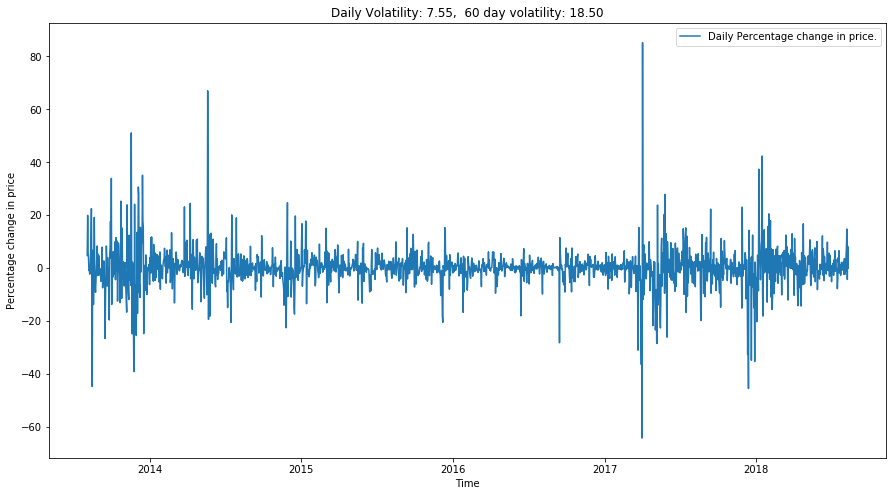

In [350]:
ripple = pd.read_csv('ripple.csv',index_col='Date', parse_dates=True,
                 engine='python')
ripple['Returns'] = ripple['Close'].pct_change().fillna(0)
ripple['Returns'] = ripple['Returns']*100

daily_volatility = ripple['Returns'].std()
sixty_day_volatility = daily_volatility * math.sqrt(6)
plt.figure(figsize=(15,8))
plt.plot(ripple.index,ripple.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')

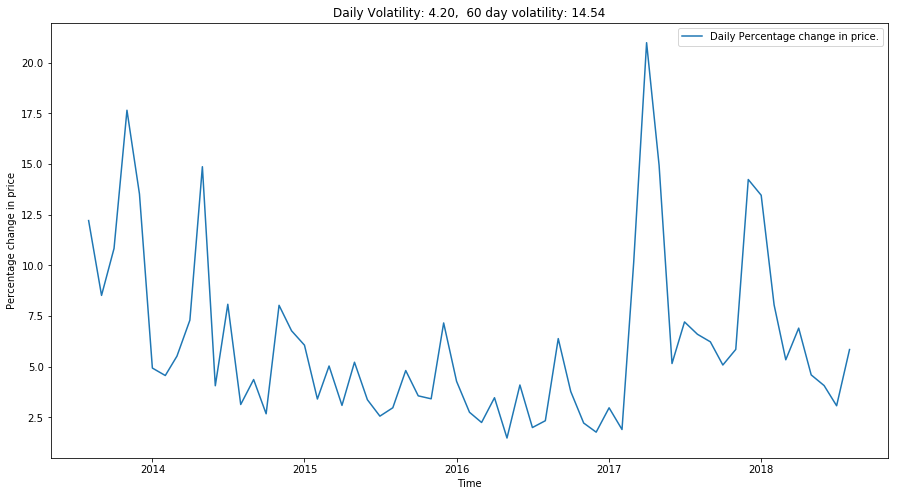

In [352]:
ripple1 = ripple.reset_index()
ripple1.Date = [datetime.date(d.year,d.month,1) for d in ripple1.Date]
ripple1 = ripple1.set_index('Date')
ripple1 = ripple1[['Returns']]
ripple1 = ripple1.groupby(['Date']).std()
daily_volatility = ripple1.std()
sixty_day_volatility = daily_volatility * math.sqrt(12)

plt.figure(figsize=(15,8))
plt.plot(ripple1.index,ripple1.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')

## Lite coin Daily Volatility and 60 day volatility

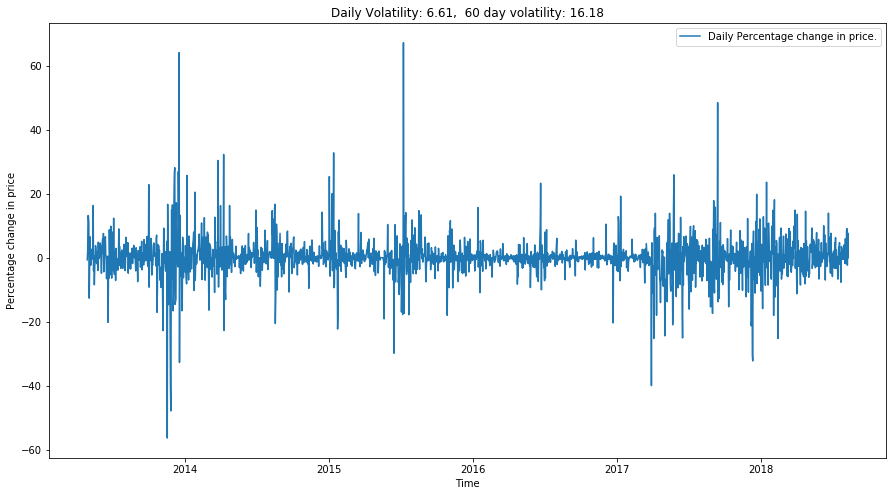

In [353]:
litecoin = pd.read_csv('litecoin.csv',index_col='Date', parse_dates=True,
                 engine='python')
litecoin['Returns'] = litecoin['Close'].pct_change().fillna(0)
litecoin['Returns'] = litecoin['Returns']*100

daily_volatility = litecoin['Returns'].std()
sixty_day_volatility = daily_volatility * math.sqrt(6)
plt.figure(figsize=(15,8))
plt.plot(litecoin.index,litecoin.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')

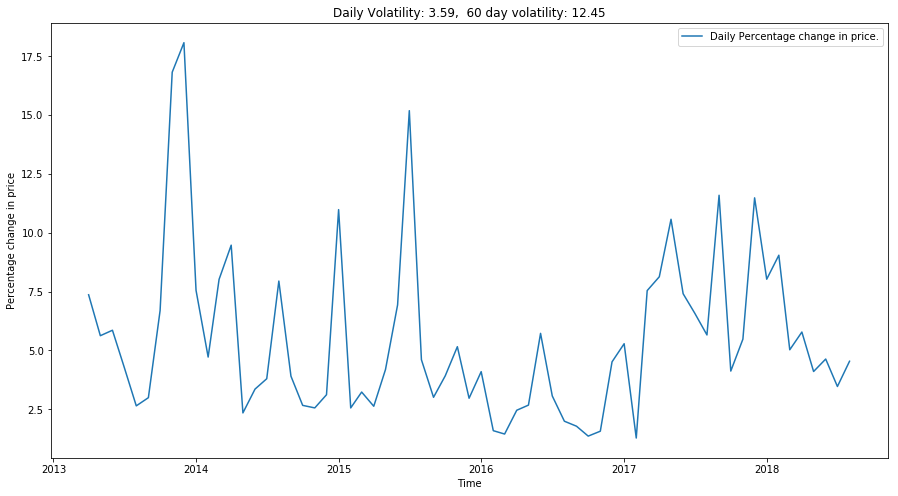

In [354]:
litecoin1 = litecoin.reset_index()
litecoin1.Date = [datetime.date(d.year,d.month,1) for d in litecoin1.Date]
litecoin1 = litecoin1.set_index('Date')
litecoin1 = litecoin1[['Returns']]
litecoin1 = litecoin1.groupby(['Date']).std()
daily_volatility = litecoin1.std()
sixty_day_volatility = daily_volatility * math.sqrt(12)

plt.figure(figsize=(15,8))
plt.plot(litecoin1.index,litecoin1.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')

## Etherium Daily Volatility and 60 Day Volatility

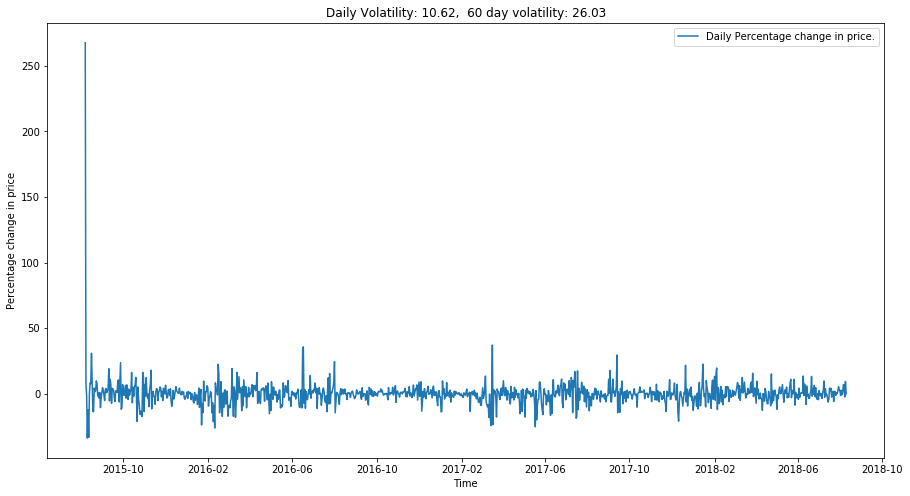

In [355]:
etherium = pd.read_csv('etherium.csv',index_col='Date', parse_dates=True,
                 engine='python')
etherium['Returns'] = etherium['Close'].pct_change().fillna(0)
etherium['Returns'] = etherium['Returns']*100

daily_volatility = etherium['Returns'].std()
sixty_day_volatility = daily_volatility * math.sqrt(6)
plt.figure(figsize=(15,8))
plt.plot(etherium.index,etherium.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')

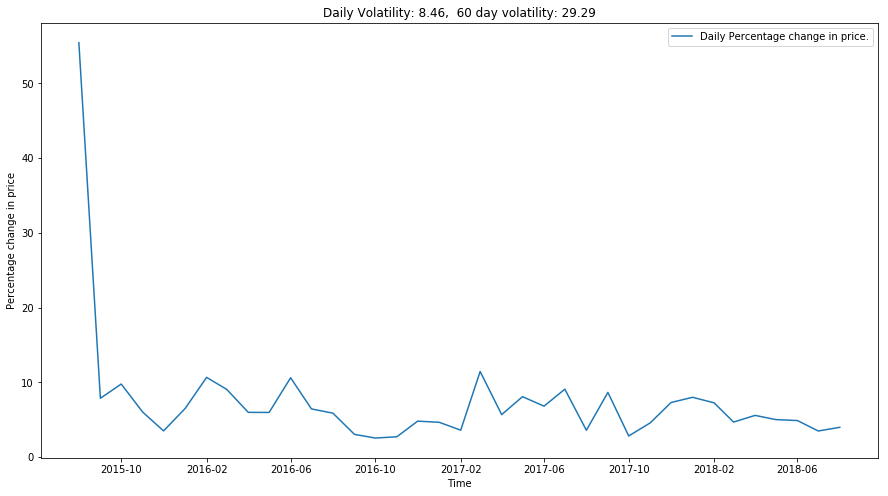

In [356]:
etherium1 = etherium.reset_index()
etherium1.Date = [datetime.date(d.year,d.month,1) for d in etherium1.Date]
etherium1 = etherium1.set_index('Date')
etherium1 = etherium1[['Returns']]
etherium1 = etherium1.groupby(['Date']).std()
daily_volatility = etherium1.std()
sixty_day_volatility = daily_volatility * math.sqrt(12)

plt.figure(figsize=(15,8))
plt.plot(etherium1.index,etherium1.Returns,label='Daily Percentage change in price.')
plt.xlabel('Time')
plt.ylabel('Percentage change in price')
plt.title('Daily Volatility: %0.2f,  60 day volatility: %0.2f'%(daily_volatility,sixty_day_volatility))
plt.legend(loc='best')